# The Aloha Cabled Observatory

February’s four session meetup series we’ll be working with long term hydrophone recordings from University of Hawaii's Aloha Cabled Observatory (ACO - http://aco-ssds.soest.hawaii.edu), located at a depth of 4728m off Oahu (N22◦45.110' W158◦00'). The recordings span a year and contain many acoustic events: wave movements, the sound of rain, ship noise, possible bomb noises, geologic activity and whale calls and songs. There is a wide range of project topics to explore: identifying and counting acoustic events such as whale calls, measuring daily or seasonal noise trends, measuring wave hydrodynamics, etc. Note: be sure to bring a good headset – there are some interesting sounds in the recordings!

Everyone from beginners to experts are welcome. As always, our three objectives are: 1. Provide skill-level-appropriate challenges to all participants. 2. Participants collaborate with and learn from one another. 3. Those who attend all four Sundays finish a project they can add to their github/resume/portfolio. Bring your favorite data analysis software! We're language-agnostic. If you don't already have a favorite analysis tool, here are a few suggestions: http://goo.gl/W8Q6cV

# The Data

In it's raw form, the recordings grow at 1.2TB / Year for the 24bbps recordings, and there are 10 years of it. We have chosen to use `mp3` as a compression format to make it more availible, at the loss of some resolution. 


This data in particular you will find to be very noisy and very big. The files are split into 5 minute tracks, with multiple options of data to study.
- Top 5 minutes of every hour for 1 year (10.5 GB)
- Top 5 minutes of every other hour for 1 year (5.3 GB)
- Continuous 2 months (20.4 GB)
- Continuous 1 month (10.2 GB)
- Continuous 2 weeks (4.8 GB)
- Continuous 1 week (2.4 GB)


# Known Issues

The audio is sampled at 24K samples per second. There may be many reasons to downsample for your analysis. When played in most audio players (except `sox`) all tracks should be re-sampled to 24K, otherwise it wont play.

# Data Requests

If you find a particularily interesting 5 minute chunk, and want some specific surrounding tracks please reach out to `probinso+pdsg@protonmail.com` with the specific datetimes. Be sure to mention why you are interested in the tracks.


# Project/Challenge Ideas

There are a lot of challenges that have varying difficulty in this data set. Audio data itself is difficult to work with. 
## Some Ideas
- Reproducable solutions/strategies to cleaning audio samples
- Find the most of an acoustic event type
    - general anomaly detector
    - species vocalizations
    - earthquakes
    - rain
- Make longitudinal coorelations with known events of the region
- Manage/study large datasets
- Design algorithms to be out of core

# ACOio

It is not nessicary to use the `ACOio` library, this is just a tool that I wrote to explore this data more easily. It is not intended to bias your interests, but if you have little audio experience it may make your life easier.

In particular features like

- `timedelta` indexing
- Simple visualizations
- `jupyter` compliant listening
- spectral subtraction
- track stitching and NAN collapsing
- file loading

You will possibly find this interface frustrating if you go deeper on the dataset. In which case I would strongly suggest looking at `scipy.signal` or your favorite signal processing library.

In [1]:
from aco import ACOio, datetime, timedelta, Mp3Loader

In [2]:
loader = ACOio('/run/media/probinso/2ACA-9292/two_months', Mp3Loader)

In [3]:
# select a date
target = datetime(
    day=1, month=3, year=2015
)

# if needed, select a duration (defaults to 5 minutes)
dur = timedelta(seconds=20)


In [4]:
src = loader.load(target, dur)

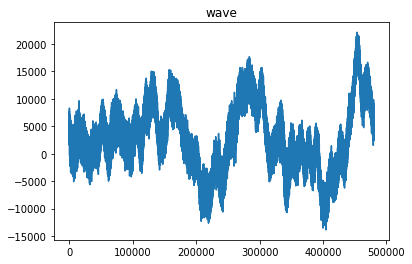

In [5]:
src.View()

In [6]:
src.Listen()

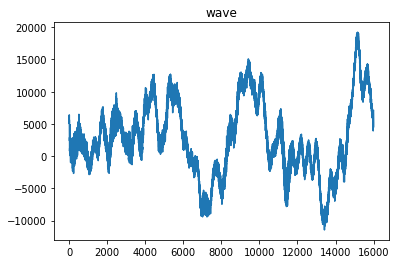

In [7]:
_ = src.resample_fs(800)
_.View()
_.Listen()

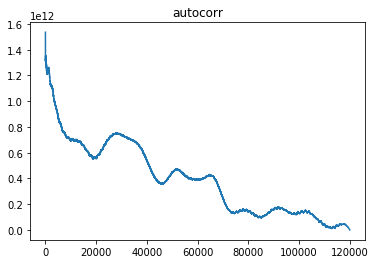

In [8]:
src[:timedelta(seconds=5)].View('autocorr')

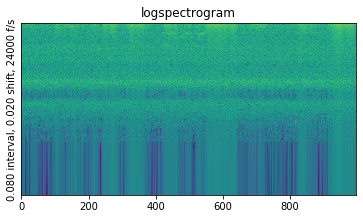

In [9]:
src.View('logspectrogram')

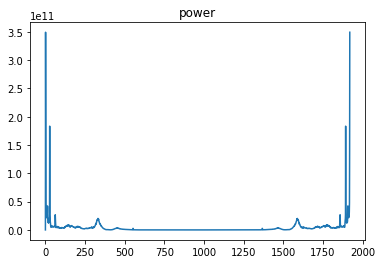

In [10]:
src.View('power')

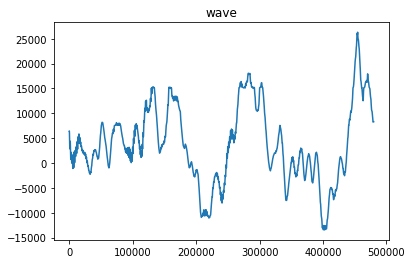

In [11]:
_ = src.lowpass(cut_off=20)
_.View()
_.Listen()

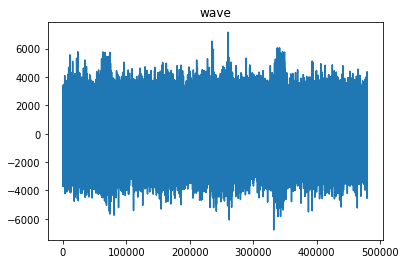

In [12]:
_ = src.highpass(cut_off=20)
_.View()
_.Listen()

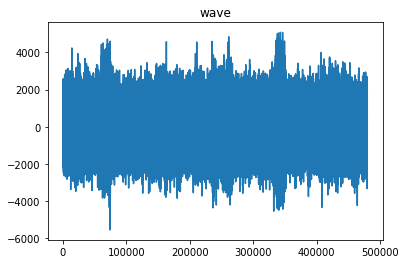

In [13]:
_ = src.highpass().lowpass()
_.View()
_.Listen()

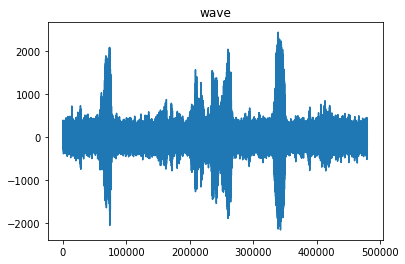

In [14]:
segment = src[:timedelta(seconds=6)]
_ = src[:timedelta(seconds=20)].highpass().lowpass().subtract(segment)
_.View()
_.Listen()

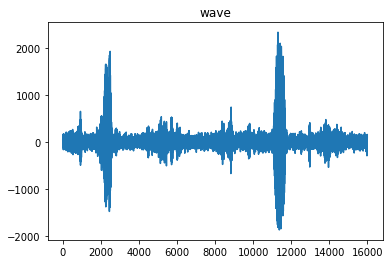

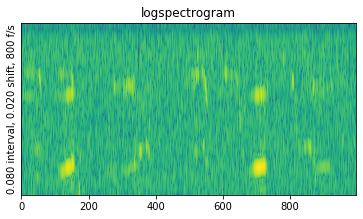

In [15]:
_ = src.highpass().lowpass().subtract(segment).resample_fs(800)
_.View()
_.View('logspectrogram')
_.Listen()